<a href="https://colab.research.google.com/github/nitwmanish/fastai/blob/master/fastai_lesson_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
import fastai
fastai.__version__

'1.0.59'

In [4]:
import torch
torch.__version__

'1.3.1'

In [5]:
path = untar_data(URLs.MNIST_SAMPLE)

In [6]:
path

PosixPath('/root/.fastai/data/mnist_sample')

In [11]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/train'),
 PosixPath('/root/.fastai/data/mnist_sample/valid'),
 PosixPath('/root/.fastai/data/mnist_sample/labels.csv')]

In [0]:
??ImageDataBunch.from_folder

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

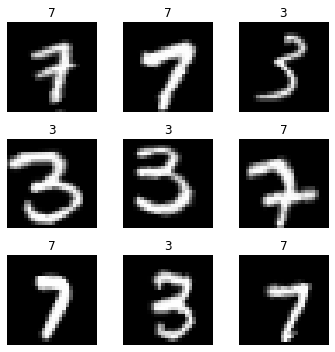

In [9]:
data.show_batch(rows=3, figsize=(5,5))

In [10]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 49.0MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.185556,0.099589,0.962218,01:38
1,0.116851,0.062143,0.976448,01:37


In [12]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

In [0]:
data.show_batch(rows=3, figsize=(5,5))

In [14]:
data.classes

[0, 1]

In [0]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)

In [16]:
data.classes

[0, 1]

In [0]:
fn_paths = [path/name for name in df['name']];

In [26]:
fn_paths[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [18]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [0]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')

In [20]:
data.classes

['3', '7']

In [21]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [0]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classesdata = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)

In [23]:
data.classes

['3', '7']

# Linear Regression problem

In [0]:
n=100

In [0]:

x = torch.ones(n,2) 

In [30]:
x.shape

torch.Size([100, 2])

In [31]:
x[:5]

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [32]:
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.7687,  1.0000],
        [ 0.0204,  1.0000],
        [-0.3900,  1.0000],
        [ 0.4303,  1.0000],
        [ 0.3565,  1.0000]])

In [0]:
a = tensor(3.,2)

In [34]:
a

tensor([3., 2.])

In [0]:
test = x@a

In [36]:
test

tensor([ 4.3061,  2.0613,  0.8299,  3.2910,  3.0695,  3.5601,  3.1304,  1.4743,
        -0.3074,  4.5291,  4.5309,  4.9061,  4.9052,  0.7022,  1.6056,  4.6487,
        -0.9234,  3.1421,  2.8420,  2.5445,  0.0165,  3.7727, -0.9992,  2.9392,
         4.4589,  2.4165,  1.5901, -0.8148,  2.2029,  3.7117,  1.5606,  0.8398,
         3.5672,  3.4261,  2.2881,  4.7346,  3.8512, -0.7958,  0.8726,  0.6225,
         2.2273, -0.3698,  4.7118, -0.7419,  4.2820,  4.3654,  4.4647,  1.4582,
         2.6036, -0.4046,  3.3384,  3.4283,  2.2400,  4.1528,  4.0771,  4.7608,
         1.6542,  1.3379, -0.4393,  2.9268,  3.5849,  3.6094,  3.7444,  2.7490,
         4.9123,  0.9871,  1.6015,  1.1312, -0.1918,  3.6163,  1.2413, -0.5548,
         0.8401,  0.5291,  0.1517,  3.4376,  0.0533, -0.1478,  3.6582, -0.8306,
         1.2656,  2.9886,  0.4968,  0.5001,  4.7212,  0.5423,  2.1403,  1.5356,
         4.6263,  3.9420, -0.7712,  3.5817,  2.5070,  3.0330,  0.6127,  3.3797,
        -0.1689,  0.7318,  1.3896,  3.97

In [0]:
y = x@a + torch.rand(n)

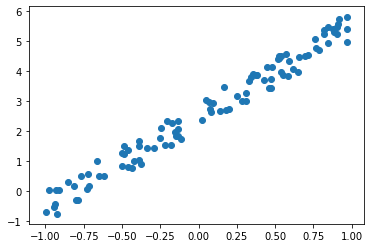

In [38]:
plt.scatter(x[:,0], y);

In [0]:
def mse(y_hat, y): 
  return ((y_hat-y)**2).mean()

In [0]:

a = tensor(-1.,1)

In [41]:
y_hat = x@a
mse(y_hat, y)

tensor(9.0176)

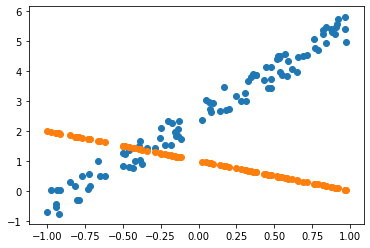

In [42]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

In [43]:

a = nn.Parameter(a);
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: 
      print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [0]:
??torch.no_grad()

In [46]:

lr = 1e-1
for t in range(100): 
  update()

tensor(9.0176, grad_fn=<MeanBackward0>)
tensor(1.3791, grad_fn=<MeanBackward0>)
tensor(0.3888, grad_fn=<MeanBackward0>)
tensor(0.1606, grad_fn=<MeanBackward0>)
tensor(0.1060, grad_fn=<MeanBackward0>)
tensor(0.0929, grad_fn=<MeanBackward0>)
tensor(0.0897, grad_fn=<MeanBackward0>)
tensor(0.0890, grad_fn=<MeanBackward0>)
tensor(0.0888, grad_fn=<MeanBackward0>)
tensor(0.0888, grad_fn=<MeanBackward0>)


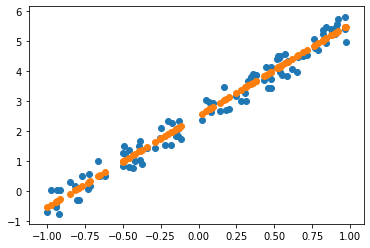

In [47]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [49]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)